# Titanic Exploratory Data Analysis

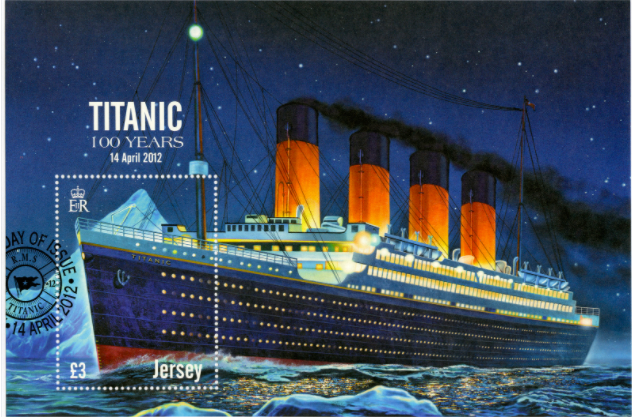

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time the deadliest of a single ship in the West and the deadliest peacetime sinking of a superliner or cruise ship to date.With much public attention in the aftermath the disaster has since been the material of many artistic works and a founding material of the disaster film genre.

## Libraries and Utilities

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Load and Check Data

In [ ]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"]

In [ ]:
train_df.columns

In [ ]:
train_df.head(10)

In [ ]:
train_df.describe()

## Variable Description

1. PassengerId: Unique id number to each passenger
1. Survived: Passenger survived(1) or died(0)
1. Pclass: Passenger class
1. Name: Name
1. Sex: Gender of passenger
1. Age: Age of passenger
1. SibSp: Number of siblings/spouses
1. Parch: Number of parents/children
1. Ticket: Ticket number
1. Fare: Amount of money spent on ticket
1. Cabin: Cabin category
1. Embarked: Port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
train_df.info()

- float64(2): Fare and Age
- int64(5): Pclass, SibSp, Parch, PassengerId and Survived
- object(5): Cabin, Embarked, Ticket, Name and Sex

## Univariate Variable Analysis

- Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, SibSp and Parch
- Numerical Variable: Fare, Age and PassengerId

### Categorical Variable

In [ ]:
a = train_df["Survived"].value_counts()
b = train_df["Sex"].value_counts()
c = train_df["Pclass"].value_counts()
d = train_df["Embarked"].value_counts()
e = train_df["SibSp"].value_counts()
f = train_df["Parch"].value_counts()
fig, axs = plt.subplots(2,3,figsize=(12,6))
#fig.suptitle('Basic Data Analysis')

axs[0, 0].bar(a.index, a, color = "royalblue")
axs[0, 0].set_title('Survived')
axs[0, 0].set(ylabel='Frequency')
axs[0, 0].set_xticks(a.index)

axs[0, 1].bar(b.index, b, color = "royalblue")
axs[0, 1].set_title('Sex')
axs[0, 1].set(ylabel='Frequency')
axs[0, 1].set_xticks(b.index)

axs[0, 2].bar(c.index, c, color = "royalblue")
axs[0, 2].set_title('Pclass')
axs[0, 2].set(ylabel='Frequency')
axs[0, 2].set_xticks(c.index)

axs[1, 0].bar(d.index, d, color = "royalblue")
axs[1, 0].set_title('Embarked')
axs[1, 0].set(ylabel='Frequency')
axs[1, 0].set_xticks(d.index)

axs[1, 1].bar(e.index, e, color = "royalblue")
axs[1, 1].set_title('SibSp')
axs[1, 1].set(ylabel='Frequency')
axs[1, 1].set_xticks(e.index)

axs[1, 2].bar(f.index, f, color = "royalblue")
axs[1, 2].set_title('Parch')
axs[1, 2].set(ylabel='Frequency')
axs[1, 2].set_xticks(f.index)
fig.tight_layout()

### Numerical Variable

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (6,4))
    plt.hist(train_df[variable], bins = 50, color = "firebrick")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

In [ ]:
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

## Basic Data Analysis

- Pclass - Survived
- Sex - Survived
- SibSp - Survived
- Parch - Survived

In [ ]:
a = train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)
b = train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)
c = train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)
d = train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)
fig, axs = plt.subplots(2,2,figsize=(10,8))
fig.suptitle('Basic Data Analysis')

axs[0, 0].bar(a["Pclass"], a["Survived"], color = "orange")
axs[0, 0].set_title('Pclass - Survived')
axs[0, 0].set(xlabel='Pclass', ylabel='Survived')

axs[0, 1].bar(b["Sex"], b["Survived"], color = "orange")
axs[0, 1].set_title('Sex - Survived')
axs[0, 1].set(xlabel='Sex', ylabel='Survived')

axs[1, 0].bar(c["SibSp"], c["Survived"], color = "orange")
axs[1, 0].set_title('SibSp - Survived')
axs[1, 0].set(xlabel='SibSp', ylabel='Survived')

axs[1, 1].bar(d["Parch"], d["Survived"], color = "orange")
axs[1, 1].set_title('Parch - Survived')
axs[1, 1].set(xlabel='Parch', ylabel='Survived')
fig.tight_layout()

## Outlier Detection

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

In [ ]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

## Missing Value

In [ ]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [ ]:
train_df.head()

### Find Missing Value

In [ ]:
train_df.columns[train_df.isnull().any()]

In [ ]:
train_df.isnull().sum()

### Fill Missing Value

In [ ]:
train_df[train_df["Embarked"].isnull()]

In [ ]:
ax = sns.boxplot(x="Embarked", y="Fare", data = train_df)

In [ ]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

In [ ]:
train_df[train_df["Fare"].isnull()]

In [ ]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [ ]:
train_df[train_df["Fare"].isnull()]

## Visualization

### Correlation Between SibSp - Parch - Age - Fare - Survived

In [ ]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
f,ax=plt.subplots(figsize = (6,6))
sns.heatmap(train_df[list1].corr(),annot= True,fmt = ".2f")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

Fare feature seems to have correlation with survived feature (0.26).

## SibSp - Survived

In [ ]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

- Having a lot of SibSp have less chance to survive.
- If sibsp == 0 or 1 or 2, passenger has more chance to survive
- We can consider a new feature describing these categories.

## Parch - Survived

In [ ]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = train_df, size = 6)
g.set_ylabels("Survived Probability")
plt.show()

- Sibsp and parch can be used for new feature extraction with th = 3
- Small familes have more chance to survive.
- There is a std in survival of passenger with parch = 3

## Pclass - Survived

In [ ]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

## Age - Survived

In [ ]:
g = sns.FacetGrid(train_df, col = "Survived", size  = 4)
g.map(sns.distplot, "Age", bins = 25)
plt.show()

- Age <= 10 has a high survival rate,
- Oldest passengers (80) survived,
- Large number of 20 years old did not survive,
- Most passengers are in 15-35 age range,
- Use age feature in training
- Use age distribution for missing value of age

## Pclass - Survived - Age

In [ ]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", size = 2)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

## Embarked - Sex - Pclass - Survived

In [ ]:
g = sns.FacetGrid(train_df, row = "Embarked", size = 2)
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

- Female passengers have much better survival rate than males.
- Males have better survival rate in pclass 3 in C.
- Embarked and sex will be used in training.

## Embarked - Sex - Fare - Survived

In [ ]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 2)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

## Fill Missing: Age Feature

In [ ]:
train_df[train_df["Age"].isnull()]

In [ ]:
sns.factorplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

Sex is not informative for age prediction, age distribution seems to be same.

In [ ]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class.

In [ ]:
sns.factorplot(x = "Parch", y = "Age", data = train_df, kind = "box")
sns.factorplot(x = "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [ ]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [ ]:
train_df[train_df["Age"].isnull()]

## Feature Engineering

### Name - Title

In [ ]:
train_df["Name"].head(10)

In [ ]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
train_df["Title"].head(10)

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

### Convert to Categorical

In [ ]:
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x="Title", data = train_df)
plt.show()

In [ ]:
g = sns.factorplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [ ]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [ ]:
train_df.head()

In [ ]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

## Family Size

In [ ]:
train_df.head()

In [ ]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [ ]:
train_df.head()

In [ ]:
g = sns.factorplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [ ]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [ ]:
train_df.head(10)

In [ ]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

In [ ]:
g = sns.factorplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

Small familes have more chance to survive than large families.

In [ ]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

## Embarked

In [ ]:
train_df["Embarked"].head()

In [ ]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [ ]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

## Ticket

In [ ]:
train_df["Ticket"].head(10)

In [ ]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

In [ ]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [ ]:
train_df["Ticket"].head(20)

In [ ]:
train_df.head()

In [ ]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

## Pclass

In [ ]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [ ]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

## Sex

In [ ]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

## Drop Passenger ID and Cabin

In [ ]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [ ]:
train_df.columns

## Modeling
### Train Test Split

In [ ]:
train_df_len

In [ ]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)

In [ ]:
test.head()

In [ ]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))
print("test:",len(test))

## Simple Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

## Hyperparameter Tuning - Grid Search - Cross Validation
We will compare 5 machine learning classifiers and evaluate mean accuracy of each of them by stratified cross validation.

- Decision Tree
- SVM
- Random Forest
- KNN
- Logistic Regression

In [ ]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores");

## Ensemble Modeling

In [ ]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

## Prediction and Submission

In [ ]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)